# Intensity Modulation - Direct Detection

This brief simulation aims of Intensity Modulation/Direct Detection detection, aims to be a gentle entry to the simulation of optical communication systems.
Troughout this script, the user will be able to understand the basics of simulation such as sampling, pulse shapping, and receivers.
Moreover, the simlation is normalized to the bit rate, meaning that the user does not need to concern about sampling rates and timing instants.

Is also worh to enphasise that all components are close to its ideal model, with no bandwidth penalties for instance. The fiber itself is only assumed to attenuate the signal, and the noise seen in the receiver comes from the photodetector/avalanchepd and EDFA. 

In [1]:
from lib import *
import matplotlib.pyplot as plt

## Simulation Parameters

As a general rule in system simulation, we start by defiving our simulation environment. 
In this case, we must define parameters such as number of bits, the sampling frequency, signal characteristics such as average power and extinction ratio, and lastly the pulse shape. The user can select between both rectangular and root raised cossine pulse formats, but keep in mind that the rectangular pulses in this simulation are close to ideal, therefore not representing any kind of bandwidth limitation that would exist on a real system.

+ 1.1. Consider that you need to simulate a system up to the sensitivity to be measured as the received optical power for a BER of $10^{-3}$. How many bits would need to be simulated to achieve an estimation that is statistically meaningful?

+ 1.2.Assume that you can specify the distribution of '1's and '0's in the bit sequence. What would be the probability of each bit so that the BER is properly estimated?

In [2]:
# Simulation Parameters
NBits = 50000  # Number of Bits
SpS  = 8       # Samples per Symbol
Pavg = -20       # Average Power
ER = 8         # Extinction Ratio
FILTER = {}    # Pulse Shapping
FILTER['SPS'] = SpS
FILTER['LS'] = 12
FILTER['BETA'] = 1 #
#FILTER['SHAPE'] = 'RC'
FILTER['SHAPE'] = 'SRRC'
#FILTER['SHAPE'] = 'RECT'
Fiber_Ls = 20   # Fiber Span Length

The next block of code generates a random bit sequence, and performs the upsampling of that sequence. This stage is needed so that we can then perform filtering for pulse shape design. On a simulation environment, the number of samples per symbol should be choosen so that the simulator can be accurate enough to represent the real world. 

Text(0, 0.5, 'E')

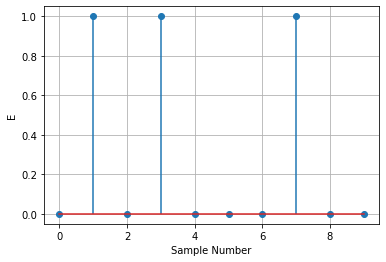

In [3]:
# Generate Binary sequence
TX_BITS = bits(NBits)

# Up-Sampling
TX_BITS = upsample(TX_BITS, SpS)
plt.stem(TX_BITS[0:10*SpS:SpS])
plt.grid()
plt.xlabel('Sample Number')
plt.ylabel('E')

### Pulse Shapping

The pulse shapping filters is an important design choice in transmission system. Not only does it directly relates to interference, but also to the bandwidth of the signal. This trade-off means that there is no right choice when designing a system, and each case should be optimized individually.

+ 1.3. The following section enables to evaluate rectangular and root raised cosine pulses. Comment on the differences between the two of them.

Text(0, 0.5, 'E')

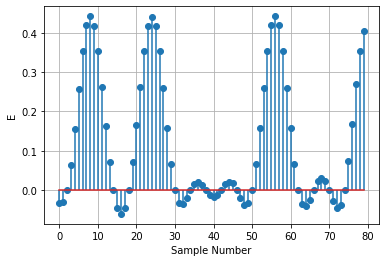

In [4]:
# Pulse Shapping
TX_Elt, delay = shapping(TX_BITS, FILTER)
plt.stem(TX_Elt[int(delay/2):int(delay/2)+10*SpS])
plt.grid()
plt.xlabel('Sample Number')
plt.ylabel('E')

## Optical Modulation
Optical signals are commonly standerdized with the average power and extinction ratio. Nevertheless, the output of the simulator is considered to be the electromagnetig field, not the power signal.
+ 1.4. Using rectangular pulses, define Pavg as 4 and ER as 8, dBm and dB respectively. Calculate the required power for both '1's and '0's. 
    
    
+ 1.5. Considering that the simulator uses optical field notation to represent the signals, how can we compute the average power of the signal?.
    

+ 1.6. Use the following code to view the signal power with respect to time. Comment on the power level associated with the '0' and what would be the value should we use an ideal NRZ modulator.
    

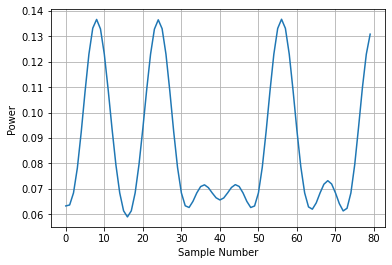

In [5]:
# Laser
TX = extmod(TX_Elt, ER, Pavg)
plt.grid()
plt.xlabel('Sample Number')
plt.ylabel('Power')
plt.plot(TX[int(delay/2):int(delay/2)+10*SpS])

## Fiber Link

As explained before, in this introductory simulation, the fiber is purely an attenuator. It is considered to have a standard attenuation coeficient of 0.22dB/Km. There is the possibility of using an EDFA to boost the signal before the receiver. In this case, a

In [6]:
# Fiber Attn
RX = fiber_attn(TX, Fiber_Ls)

In [7]:
# EDFA
#print(li2db(avgpow(RX)))
#RX = edfa(RX,20,10e9)
#print(li2db(avgpow(RX)))

# Optical Receiver

The most import component of the optical receiver is the detector as it converts the incoming optical signal onto an electrical current. The component however is not ideal and there the conversion is not 100% efficient and is also impaired with different types of noise. In these simulation, the optoeletronic converter accounts for both thermal and shotnoise.
After the opto-electrical conversion, the signal is then feeded to the decision circuit that optimized the threshold between the two symbol levels.

+ 1.7. What is the principal diference between a photodiode and an avalanche photodiode?
+ 1.8. Set Pavg and ER to 0 dBm and 8 dB respectively and activate the APD. Run the code up to the point bellow and comment on the noise power in both '1's and '0's. 
+ 1.9. Evaluate the sensitivity, at BER=10−3, of this system using either the photodiode or the apd, using square
pulses and an ER of 8 dB. After choosing the one that provides highest sensitivity, comment the effect of
changing the pulse shape to SRRC/RC. As a tip, consider to enclose the full script on a for loop where you
sweep the average launch power.


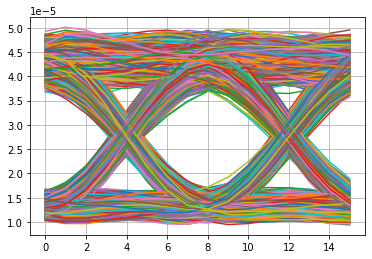

In [8]:
# Photodiode
#I = photodiode( RX, 0.8)
I = apd( RX, 0.8)

# Matched Filtering
I , delay = rxfilter( I, FILTER)
eyediagram(I, SpS, delay)

In [9]:
# Decision Circuit and BER Estimation
BERC = ber(sampler(I, SpS, init=delay-1), sampler(TX_BITS, SpS))
print('Estimated BER: ',BERC[1])
plt.show()

Estimated BER:  0.0
